In [860]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">
    
* [1. Introduction](#1)
    - [Problem statement](#1.1)
    - [Data description](#1.2)
    
* [2. Import Libraries](#2) 
    
* [3. Basic Exploration](#3)
    - [Read dataset](#3.1)
    - [Some information](#3.2)
    - [Data transformation](#3.3)
    - [Data visualization](#3.4)
* [4. Machine Learning model](#4)
    
* [5 Conclusion](#5)

* [6 Author Message](#6)

[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Introduction</b></div>

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Problem</b> statement

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> description

[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Import Libraries</b></div>

In [861]:
import pandas as pd
import numpy as np

# Scalling & Normalization
# for Box-Cox Transformation
from scipy import stats
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# Plotting modules
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

print("Setup Complete")

Setup Complete


[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Basic Exploration</b></div>

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Read</b> dataset

In [862]:
def read_dataset(file_path, index_name = None):
    if index_name != None:
        data = pd.read_csv(file_path, index_col = index_name)
    else:
        data = pd.read_csv(file_path)
    return data

In [863]:
file_path = '/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv'
data = read_dataset(file_path)

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Some</b> information

In [864]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [865]:
data.shape

(374, 13)

In [866]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [867]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [868]:
data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [869]:
data.duplicated().any()

False

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> transformation

[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Missing Data Treatment</b></span>

In [870]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  374


,Total Missing,In Percent
Person ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
Sleep Duration,0,0.0
Quality of Sleep,0,0.0
Physical Activity Level,0,0.0
Stress Level,0,0.0
BMI Category,0,0.0
Blood Pressure,0,0.0


[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Duplicated Data Treatment</b></span>

[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana;"> 
None!
</span>

[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Cleaning & Processing Data</b></span>

In [871]:
# Check probity of data
print(data['Gender'].unique()) # ['Male', 'Female']
print(data['BMI Category'].unique()) # ['Overweight', 'Obese', 'Normal']
print(data['Sleep Disorder'].unique()) # ['None', 'Insomnia', 'Sleep Apnea']

['Male' 'Female']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
['None' 'Sleep Apnea' 'Insomnia']


In [872]:
def fix_BMI (x):
    if x == 'Normal Weight':
        return 'Normal'
    return x

data['BMI Category'] = data['BMI Category'].apply(lambda x : fix_BMI(x))

In [873]:
# Data collection
data.insert(loc = 2, column = 'Age Group', value = pd.cut(x = data['Age'], bins=[0, 16, 30, 45, 100], labels=['Child', 'Young Adults', 'Middle-aged Adults', 'Old Adults']))

In [874]:
def blood_pressure_targets(bp):
    result = None
    sys, dias = map(int, bp.split('/'))
    if sys < 90 or dias < 60:
        result = 'Low'
    elif sys < 120 and dias < 80:
        result = 'Normal'
    elif sys in range(120, 130) and dias < 80:
        result = 'Elevated'
    elif sys in range(130, 140) or dias in range(80,90):
        result = 'Hypertension Stage 1'
    elif sys >= 140 or dias >= 90:
        result = 'Hypertension Stage 2'
    elif sys > 180 or dias > 120:
        result = 'Hypertensive Crisis'
    return result

def heart_rate_targets(hr):
    result = None
    if hr < 60:
        result = 'Bradycardia'
    elif hr <= 100:
        result = 'Normal'
    else:
        result = 'Tachycardia'
    return result

In [875]:
data['Blood Pressure'] = data['Blood Pressure'].astype(str)
idx = data.columns.get_loc('Blood Pressure') + 1
data.insert(loc = idx, column = 'Blood Pressure Targets', value = data['Blood Pressure'].apply(lambda x : blood_pressure_targets(x)))

In [876]:
idx = data.columns.get_loc('Heart Rate') + 1
data.insert(loc = idx, column = 'Heart Rate Targets', value = data['Heart Rate'].apply(lambda x : heart_rate_targets(x)))

In [877]:
# Scalling: Physical Activity Level, Heart Rate, Daily Steps
original_PALevel = np.array(data['Physical Activity Level'].tolist(), int)
scaled_PALevel = minmax_scaling(original_PALevel, columns=[0])

original_HRate = np.array(data['Heart Rate'].tolist(), int)
scaled_HRate = minmax_scaling(original_HRate, columns=[0])

original_DSteps = np.array(data['Daily Steps'].tolist(), int)
scaled_DSteps = minmax_scaling(original_DSteps, columns=[0])

In [878]:
# Normalization: Sleep Duration, Quality of Sleep, Stress Level
original_SDuration = np.array(data['Sleep Duration'].tolist(), float)
normalized_SDuration = stats.boxcox(original_SDuration)

original_SQuality = np.array(data['Quality of Sleep'].tolist(), int)
normalized_SQuality = stats.boxcox(original_SQuality)

original_SLevel = np.array(data['Stress Level'].tolist(), int)
normalized_SLevel = stats.boxcox(original_SLevel)

In [879]:
data.head()

,Person ID,Gender,Age Group,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Blood Pressure Targets,Heart Rate,Heart Rate Targets,Daily Steps,Sleep Disorder
0,1,Male,Young Adults,27,Software Engineer,6.1,6,42,6,Overweight,126/83,Hypertension Stage 1,77,Normal,4200,None
1,2,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,Hypertension Stage 1,75,Normal,10000,None
2,3,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,Hypertension Stage 1,75,Normal,10000,None
3,4,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,Hypertension Stage 2,85,Normal,3000,Sleep Apnea
4,5,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,Hypertension Stage 2,85,Normal,3000,Sleep Apnea


[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> visualization

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Features Counting</b></span>

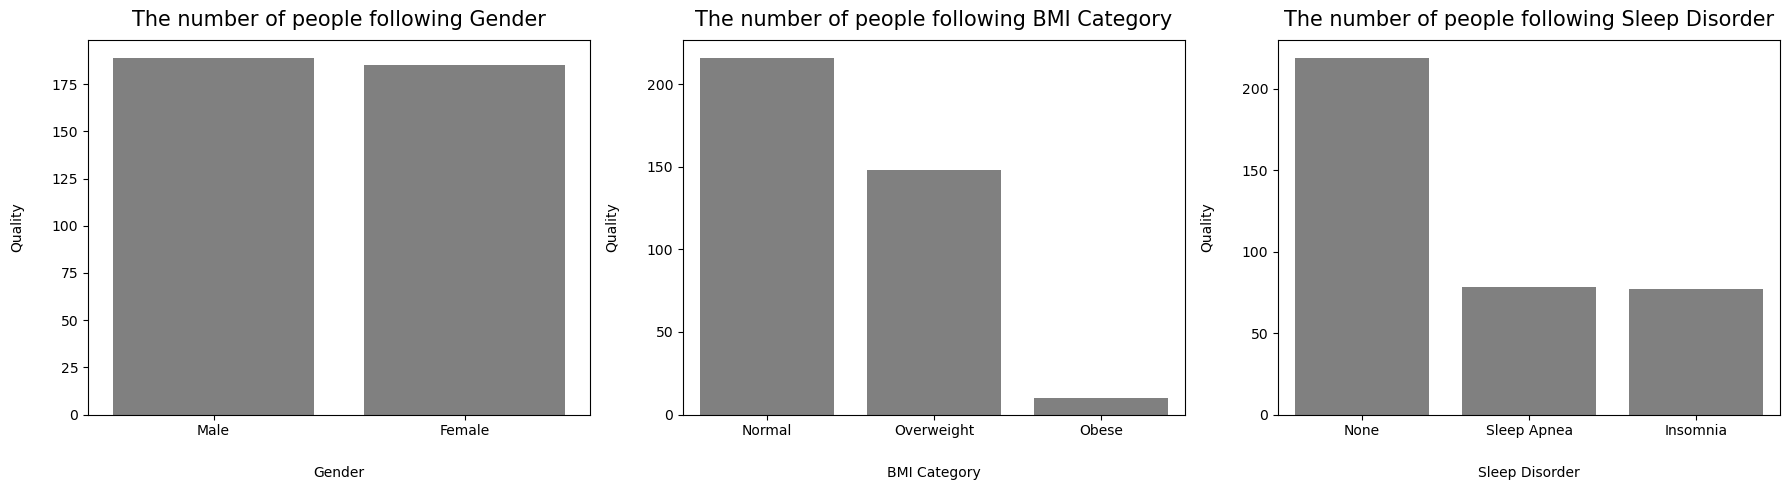

In [880]:
fig, axes = plt.subplots(1, 3, figsize=(18,5)) 

col_names = ['Gender', 'BMI Category', 'Sleep Disorder']
for i in range(0, len(col_names)):
    sns.barplot(ax = axes[i], data = data[col_names[i]].value_counts().reset_index(), x = 'index', y = col_names[i], color = 'grey')
    axes[i].set_title("The number of people following {}".format(col_names[i]), pad=10, fontsize=15)
    axes[i].set_ylabel("Quality", labelpad=20)
    axes[i].set_xlabel(col_names[i], labelpad=20)

plt.tight_layout()

plt.show()

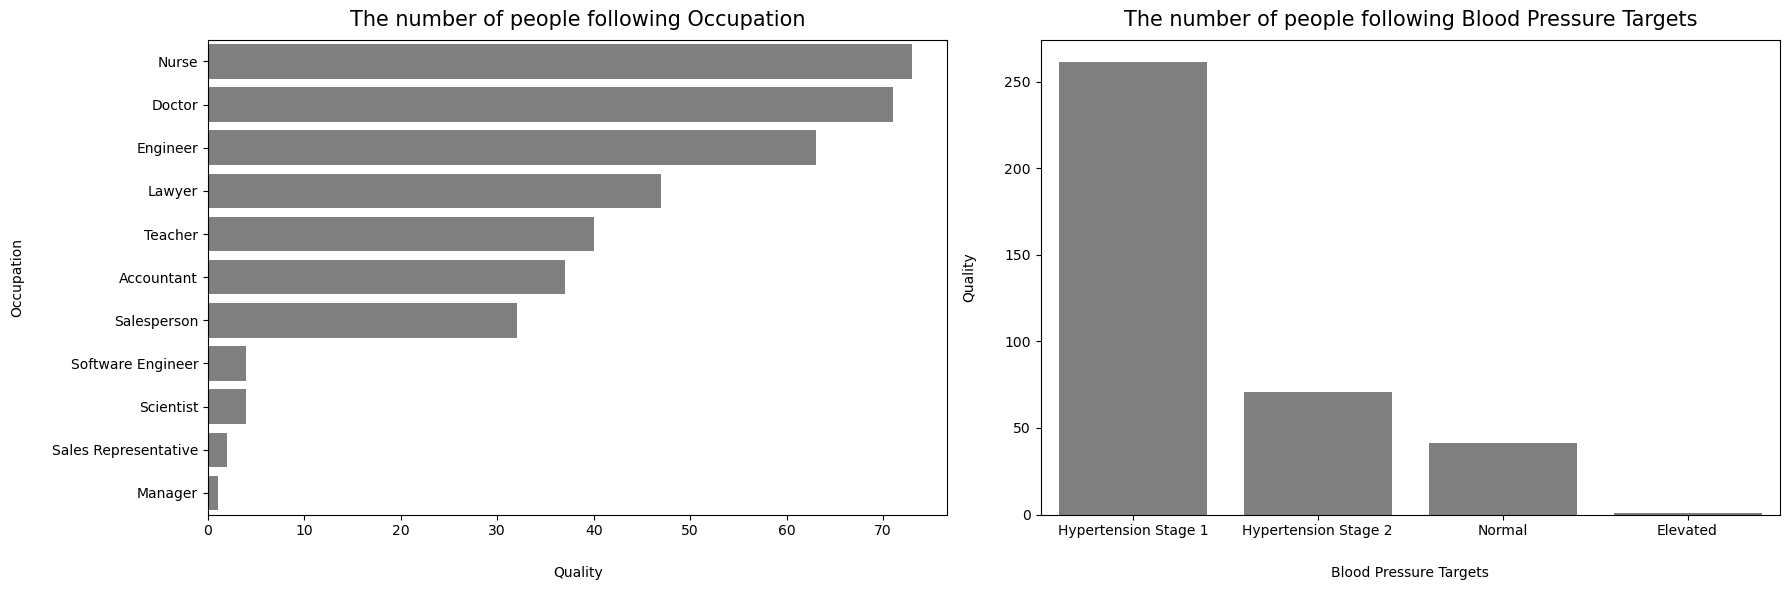

In [881]:
fig, axes = plt.subplots(1, 2, figsize = (18,6))

sns.barplot(ax = axes[0], data = data['Occupation'].value_counts().reset_index(), x = 'Occupation', y = 'index', color = 'grey')
sns.barplot(ax = axes[1], data = data['Blood Pressure Targets'].value_counts().reset_index(), y = 'Blood Pressure Targets', x = 'index', color = 'grey')

axes[0].set_title("The number of people following Occupation", pad = 10, fontsize = 15)
axes[0].set_xlabel("Quality", labelpad = 20)
axes[0].set_ylabel("Occupation", labelpad = 20)

axes[1].set_title("The number of people following Blood Pressure Targets", pad = 10, fontsize = 15)
axes[1].set_xlabel("Blood Pressure Targets", labelpad = 20)
axes[1].set_ylabel("Quality", labelpad = 20)

plt.tight_layout()
plt.show()

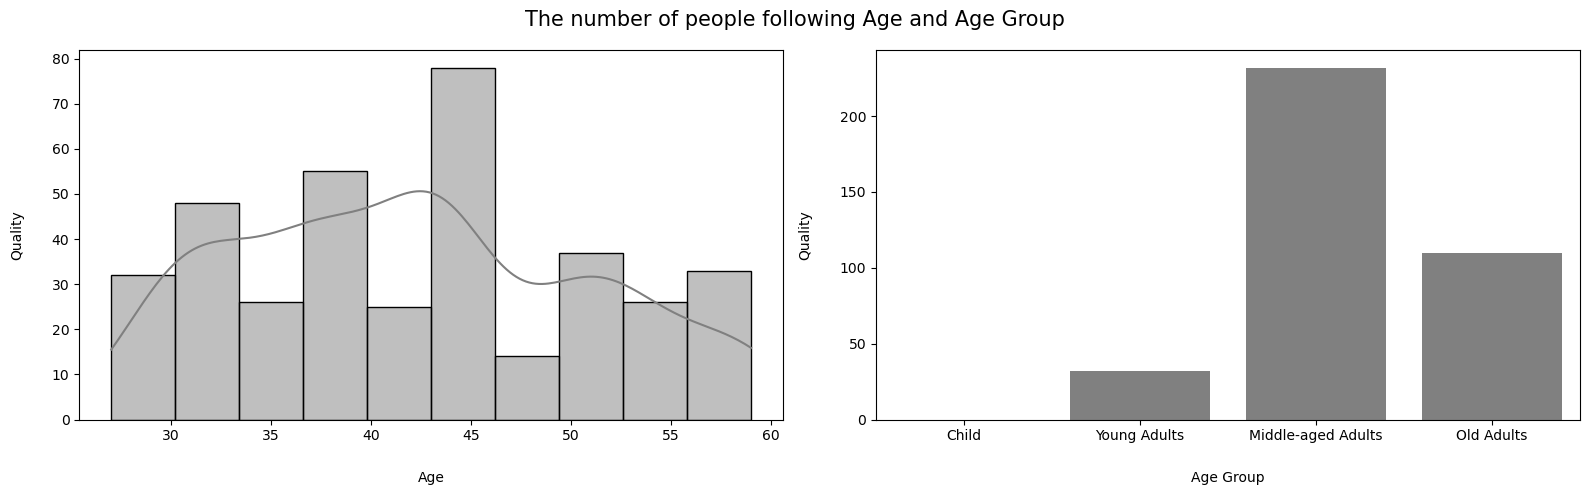

In [882]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))

sns.histplot(ax = axes[0], data = data['Age'], color = 'grey', kde = True)
sns.barplot(ax = axes[1], data = data['Age Group'].value_counts().reset_index(), x = 'index', y = 'Age Group', color = 'grey')

fig.suptitle("The number of people following Age and Age Group", fontsize = 15)

axes[0].set_xlabel('Age', labelpad = 20)
axes[0].set_ylabel('Quality', labelpad = 20)

axes[1].set_xlabel('Age Group', labelpad = 20)
axes[1].set_ylabel('Quality', labelpad = 20)

plt.tight_layout()
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Scalling & Normalization</b></span>

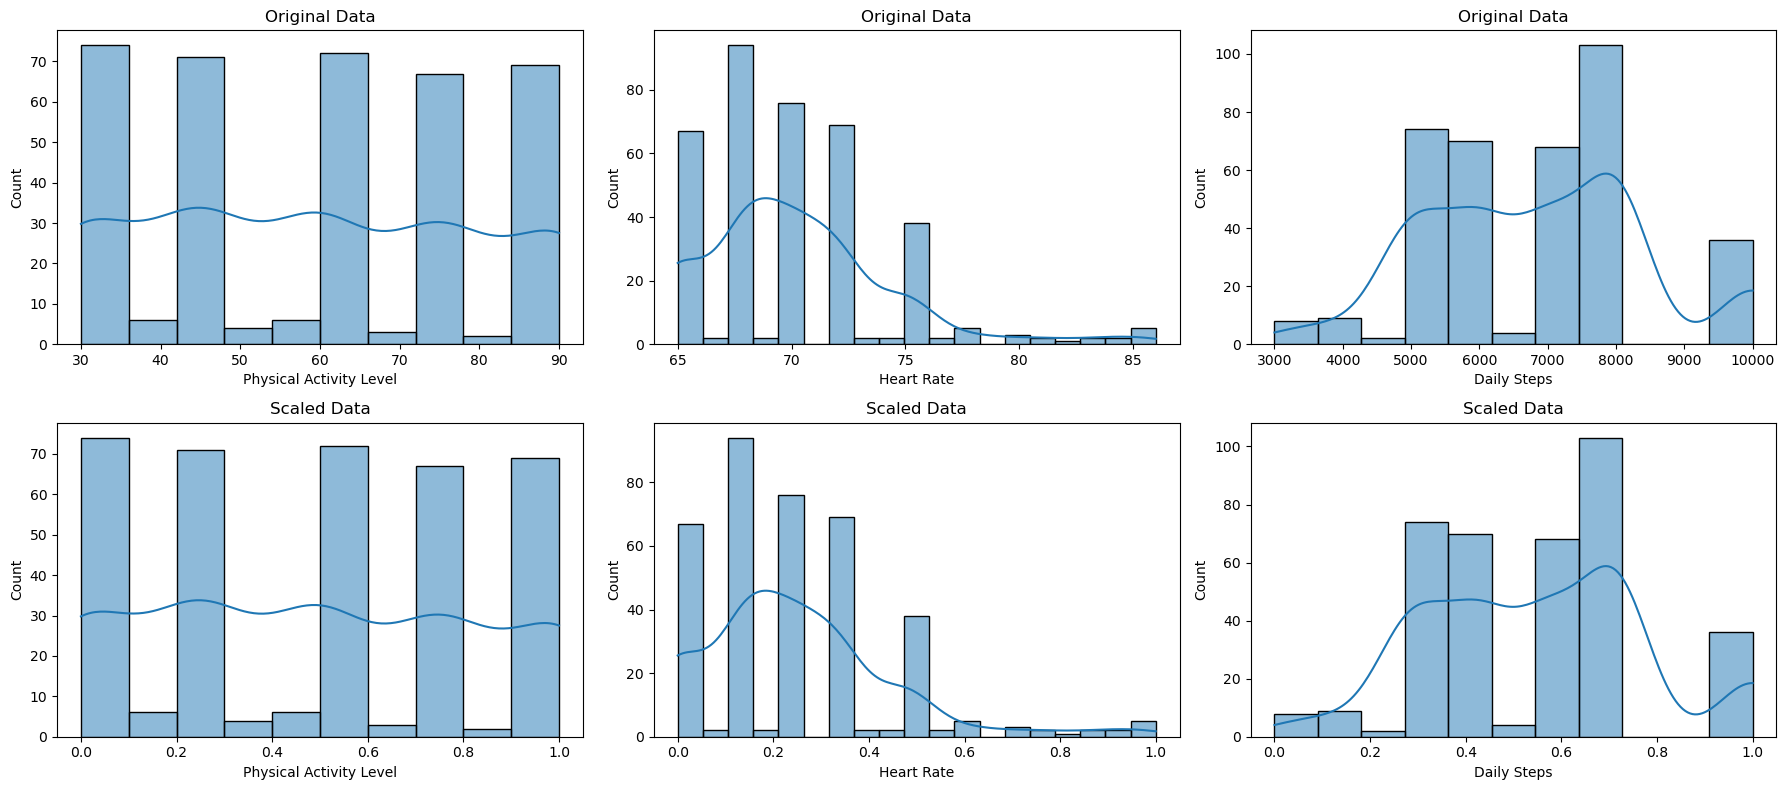

In [883]:
# Scalling data

original_datas = [original_PALevel, original_HRate, original_DSteps]
scaled_datas = [scaled_PALevel, scaled_HRate, scaled_DSteps]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
x_labels = ['Physical Activity Level', 'Heart Rate', 'Daily Steps']
titles = ['Original Data', 'Scaled Data']

for i in range(3):
    sns.histplot(original_datas[i], ax=axes[0, i], kde=True, legend=False)
    sns.histplot(scaled_datas[i], ax=axes[1, i], kde=True, legend=False)
    
    axes[0, i].set_title(titles[0])
    axes[1, i].set_title(titles[1])
    
    axes[0, i].set_xlabel(x_labels[i])
    axes[1, i].set_xlabel(x_labels[i])

plt.tight_layout()
plt.show()


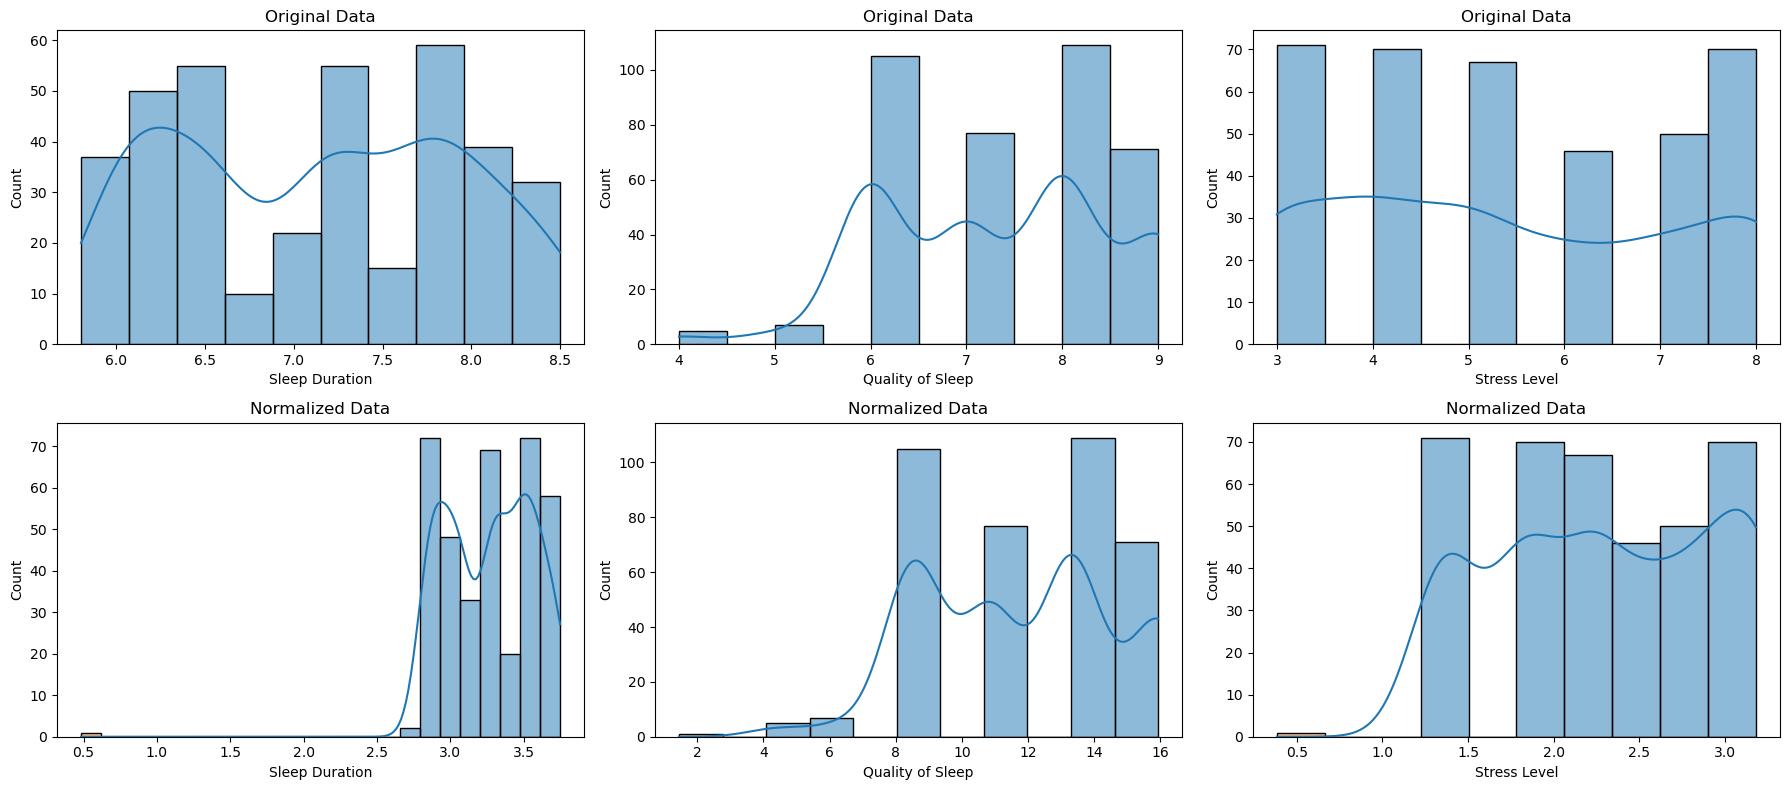

In [884]:
# Normalized data: Quality of Sleep, Stress Level

original_datas = [original_SDuration, original_SQuality, original_SLevel]
normalized_datas = [normalized_SDuration, normalized_SQuality, normalized_SLevel]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
x_labels = ['Sleep Duration', 'Quality of Sleep', 'Stress Level']
titles = ['Original Data', 'Normalized Data']

for i in range(3):
    sns.histplot(original_datas[i], ax=axes[0, i], kde=True, legend=False)
    sns.histplot(normalized_datas[i], ax=axes[1, i], kde=True, legend=False)
    
    axes[0, i].set_title(titles[0])
    axes[1, i].set_title(titles[1])
    
    axes[0, i].set_xlabel(x_labels[i])
    axes[1, i].set_xlabel(x_labels[i])

plt.tight_layout()
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Factors affecting quality of sleep</b></span>

<Figure size 1800x500 with 0 Axes>

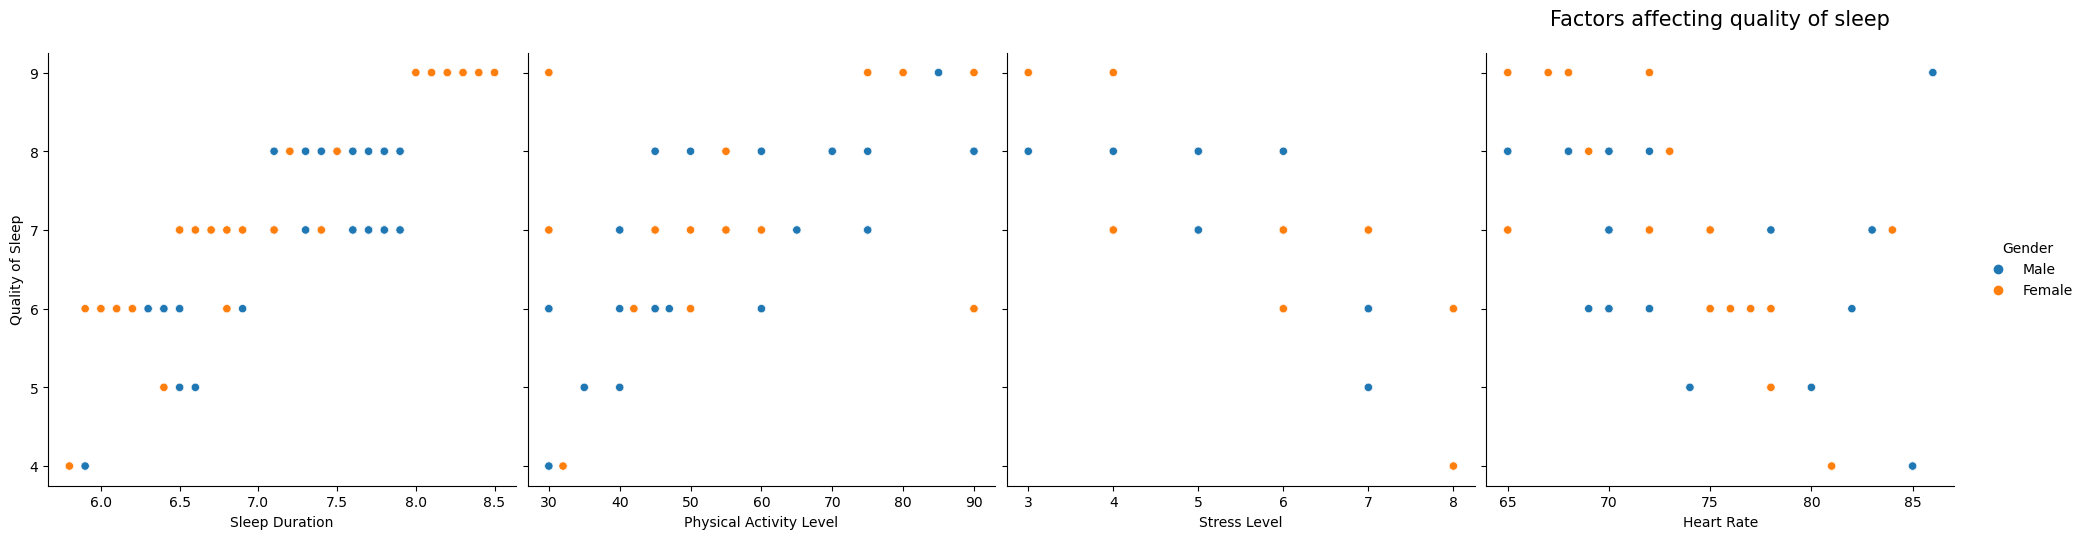

In [885]:
fig = plt.figure(figsize= (18,5))

sns.pairplot(data = data, x_vars = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate'], y_vars = ['Quality of Sleep'], hue = 'Gender', height = 5)
plt.title('Factors affecting quality of sleep', pad = 20, fontsize = 15)
plt.axis('tight')
plt.show()

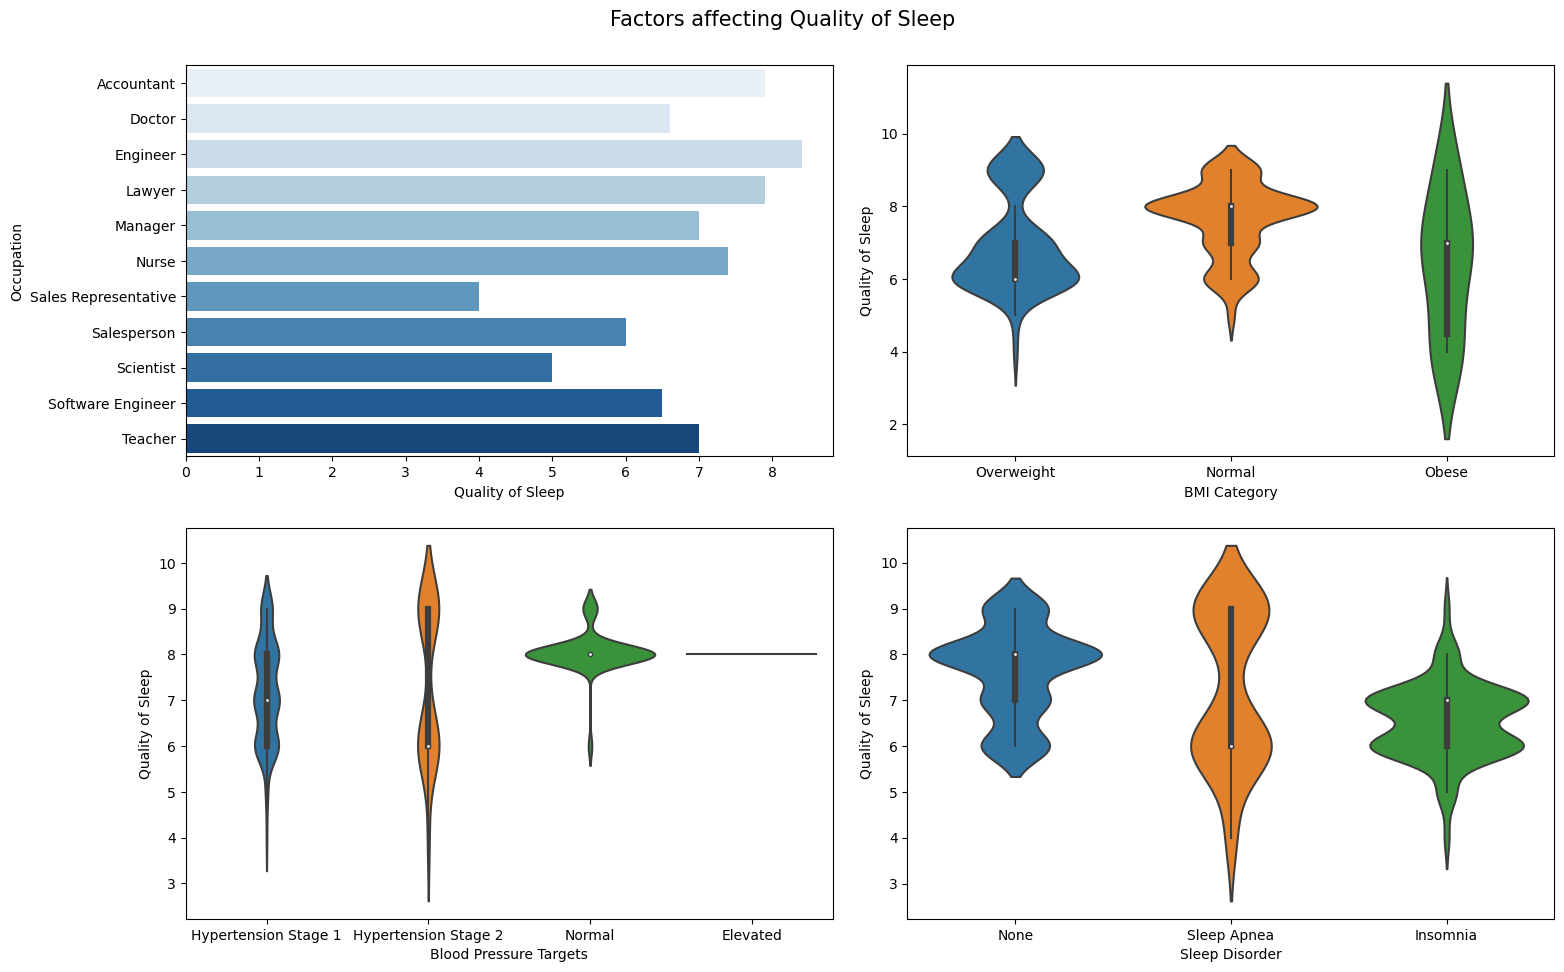

In [886]:
fig, axes = plt.subplots(2, 2, figsize = (16,10))

sns.barplot(ax = axes[0, 0], data = data.groupby('Occupation')['Quality of Sleep'].mean().round(1).reset_index(), x = 'Quality of Sleep', y = 'Occupation', palette = "Blues")
sns.violinplot(ax = axes[0, 1], data = data, x = 'BMI Category', y = 'Quality of Sleep')
sns.violinplot(ax = axes[1, 0], data = data, x = 'Blood Pressure Targets', y = 'Quality of Sleep')
sns.violinplot(ax = axes[1, 1], data = data, x = 'Sleep Disorder', y = 'Quality of Sleep')

fig.suptitle("Factors affecting Quality of Sleep", fontsize = 15)

plt.tight_layout(pad = 2)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Causes of stress level</b></span>

fig, axes = plt.subplots(2, 2, figsize = (16,10))

sns.barplot(ax = axes[0, 0], data = data.groupby('Occupation')['Stress Level'].mean().round(1).reset_index(), x = 'Stress Level', y = 'Occupation', palette = "Blues")
sns.violinplot(ax = axes[0, 1], data = data, x = 'BMI Category', y = 'Stress Level')
sns.violinplot(ax = axes[1, 0], data = data, x = 'Blood Pressure Targets', y = 'Stress Level')
sns.violinplot(ax = axes[1, 1], data = data, x = 'Sleep Disorder', y = 'Stress Level')

fig.suptitle("Factors affecting Stress Level", fontsize = 15)

plt.tight_layout(pad = 2)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Causes of sleep disorder</b></span>

In [887]:
effect_of_BMI_category = data.groupby(['Sleep Disorder', 'BMI Category']).size().reset_index()
effect_of_BMI_category.columns = ['Sleep Disorder', 'BMI Category', 'Count']
effect_of_blood_pressure_targets = data.groupby(['Sleep Disorder', 'Blood Pressure Targets']).size().reset_index()
effect_of_blood_pressure_targets.columns = ['Sleep Disorder', 'Blood Pressure Targets', 'Count']


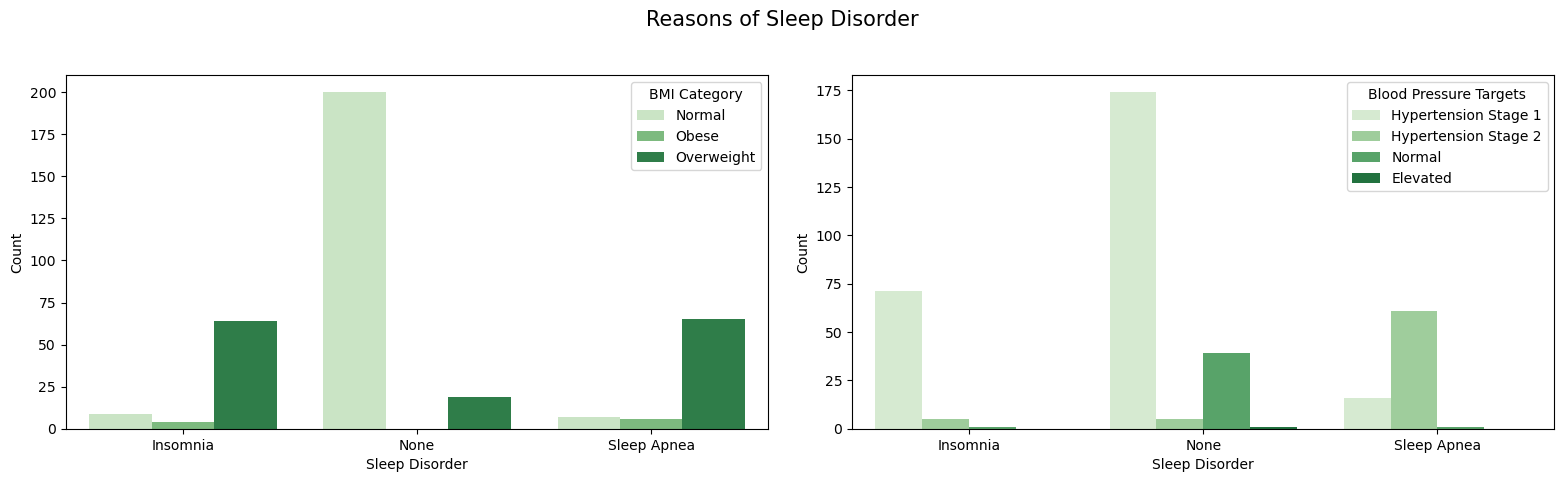

In [888]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))

sns.barplot(ax = axes[0], data = effect_of_BMI_category, x = 'Sleep Disorder', y = 'Count', hue = 'BMI Category', palette = "Greens")
sns.barplot(ax = axes[1], data = effect_of_blood_pressure_targets, x = 'Sleep Disorder', y = 'Count', hue = 'Blood Pressure Targets', palette = "Greens")

fig.suptitle("Reasons of Sleep Disorder", fontsize = 15)

plt.tight_layout(pad = 2)
plt.show()

[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Machine Learning Model</b></div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Import</b> libraries

In [889]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from category_encoders import MEstimateEncoder

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Useful</b> functions

In [890]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [891]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [892]:
def make_mi_scores(X, y):
    X = X.copy()
    # Label encoding for categoricals
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [893]:
def score_dataset(X, y, model = XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [894]:
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Feature</b> engineering

In [895]:
file_path = '/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv'
data = read_dataset(file_path, 'Person ID')

X = data.copy()
y = X.pop("Quality of Sleep")

score =  score_dataset(X, y)
print(f"Score: {score:.5f} RMSLE")


Score: 0.05733 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Mutual Information</b></span>

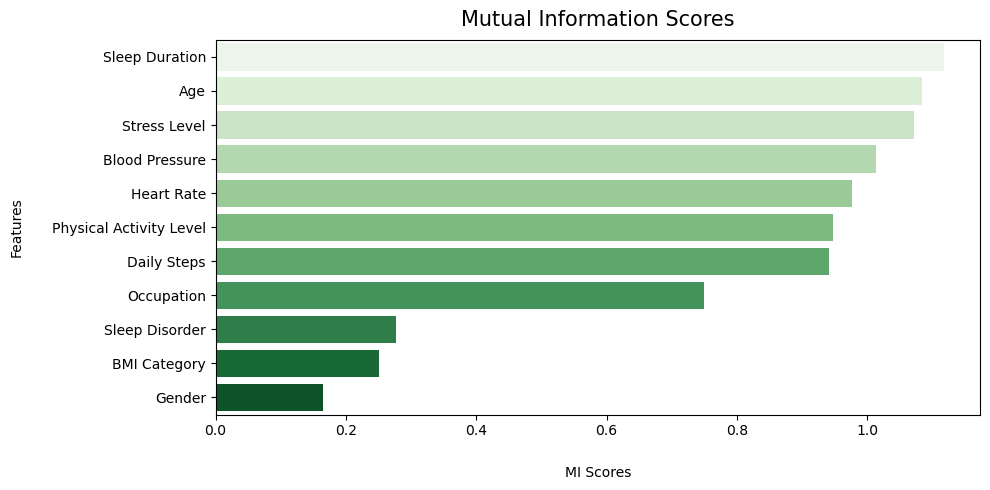

In [896]:
mi_scores = make_mi_scores(X, y)

fig = plt.figure(figsize = (10,5))

sns.barplot(data = mi_scores.reset_index(), x = 'MI Scores', y = 'index', palette = 'Greens')

plt.title("Mutual Information Scores", pad = 10, fontsize = 15)
plt.ylabel("Features", labelpad = 20)
plt.xlabel("MI Scores", labelpad = 20)

plt.tight_layout()
plt.show()

In [897]:
data = data.drop(['Sleep Disorder', 'BMI Category', 'Gender'], axis = 1)

X = data.copy()
y = X.pop('Quality of Sleep')

# Results
score =  score_dataset(X, y)
print(f"Score: {score:.5f} RMSLE")

Score: 0.05474 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Principal Component Analysis - PCA</b></span>

In [898]:
X = data.copy()
features = ['Age', 'Stress Level', 'Heart Rate', 'Physical Activity Level', 'Daily Steps']
X = X.loc[:, features]

pca, X_pca, loadings = apply_pca(X_scaled)
print(loadings)

                              PC1       PC2       PC3       PC4       PC5
Age                     -0.378323 -0.320240  0.782285 -0.375608 -0.035592
Stress Level             0.639899  0.163284  0.071170 -0.592295 -0.456059
Heart Rate               0.579885  0.136505  0.550343  0.405821  0.421346
Physical Activity Level  0.207616 -0.669061  0.023323  0.461429 -0.543868
Daily Steps              0.260827 -0.636010 -0.282036 -0.361244  0.563400


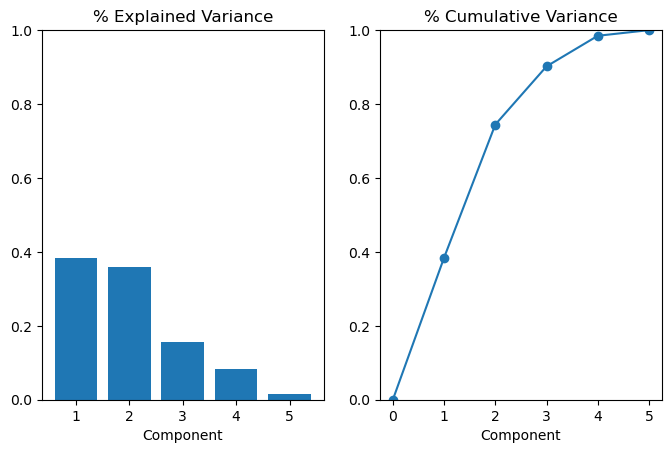

In [899]:
plot_variance(pca);

In [900]:
X = data.copy()
y = X.pop("Quality of Sleep")

X = X.join(X_pca)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

Your score: 0.05494 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Clustering With K-Means</b></span>

In [901]:
X = data.copy()
# features = ['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate', 'Physical Activity Level', 'Daily Steps']
features = ['Age', 'Stress Level', 'Heart Rate', 'Physical Activity Level', 'Daily Steps']
# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("category")

# Create the cluster-distance features using `fit_transform`
X_cd = kmeans.fit_transform(X_scaled)
# centroids 0 - 9

# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])


In [902]:
X = data.copy()
y = X.pop("Quality of Sleep")

X = X.join(X_cd)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

Your score: 0.05132 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Build Final Model</b></span>

In [903]:
X_full = data.copy()

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['Quality of Sleep'], inplace=True)
y = X_full['Quality of Sleep']
X_full.drop(['Quality of Sleep'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()



In [904]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [905]:
DT_model = DecisionTreeRegressor(random_state=0)
RF_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
DT_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DT_model)])
RF_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RF_model)])

# Evaluate the model
DT_score = score_model(DT_pipeline)
RF_score = score_model(RF_pipeline)
print(f'MAE for Decision Tree Regressor Model: {DT_score:.5f}')
print(f'MAE for Random Forest Regressor Model: {RF_score:.5f}')
print(f'Average MAE score for Decision Tree Regressor Model (across experiments): {score_dataset(X_train, y_train, DT_pipeline):.5f}')
print(f'Average MAE score for Random Forest Regressor Model (across experiments): {score_dataset(X_train, y_train, RF_pipeline):.5f}')

MAE for Decision Tree Regressor Model: 0.01333
MAE for Random Forest Regressor Model: 0.04080
Average MAE score for Decision Tree Regressor Model (across experiments): 0.02443
Average MAE score for Random Forest Regressor Model (across experiments): 0.02428


In [906]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 1000, 5000]
for leaf_size in candidate_max_leaf_nodes:
    model = DecisionTreeRegressor(max_leaf_nodes = leaf_size, random_state = 0)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    score = round(score_model(my_pipeline),5)
    print("Leaf size {} MAE: {}".format(leaf_size, score))

Leaf size 5 MAE: 0.15515
Leaf size 25 MAE: 0.01333
Leaf size 50 MAE: 0.01333
Leaf size 100 MAE: 0.01333
Leaf size 250 MAE: 0.01333
Leaf size 500 MAE: 0.01333
Leaf size 1000 MAE: 0.01333
Leaf size 5000 MAE: 0.01333


In [907]:
final_model = DecisionTreeRegressor(max_leaf_nodes = 50, random_state = 0)

# Bundle preprocessing and modeling code in a pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', final_model)])
# Evaluate the model
score = score_model(final_pipeline)
print(f'MAE: {score:.5f}')

MAE: 0.01333
